## Estadística Aplicada

Actividad 5     
19 septiembre

Francisco Javier Chávez Hernández 2034204

Gpo 044

In [65]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from lifelines import KaplanMeierFitter, ExponentialFitter, CoxPHFitter, WeibullFitter, LogNormalFitter
import seaborn as sns

## 3. Data frame quiebra

In [69]:

df_quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

Mide los años que tarda en quebrar una empresa (desde que se crea hasta que quiebra), la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada (no se observó la quiebra en el periodo de observación). La variable mujer toma valores de 0 si el fundador de la empresa es hombre y 1 si el fundador de la empresa es mujer. La variable tiempo mide los años que tardo en quebrar la empresa. 

In [70]:
df_quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [71]:
#a) ajuste un modelo de supervivencia exponencial
df_quiebra.dtypes


tiempo     int64
mujer      int64
quebrar    int64
dtype: object

In [72]:
df_quiebra.isnull().sum()

tiempo     0
mujer      0
quebrar    0
dtype: int64

In [73]:
exp=ExponentialFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])

In [74]:
exp.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


In [84]:
exp.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


(0.0225, 0.0425)

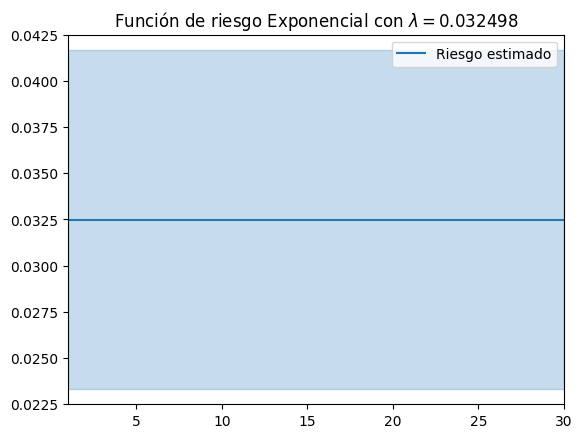

In [75]:
#b) Graficar la funcion de riesgo exponencial 
exp.plot_hazard(label='Riesgo estimado')
plt.title('Función de riesgo Exponencial con $\lambda=0.032498$')
plt.xlim(1,30)
plt.ylim(0.0225,0.0425)

In [76]:
## c) ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial?


El riesgo que una empresa falle según la función exponencial es igual a $\lambda=0.032498$

## 4. Con la base de datos del punto 3 responda en la misma notebook lo siguiente:


In [80]:
#a)Ajuste un modelo Weibull de supervivencia 
mw=WeibullFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])

In [82]:
mw.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


(1.0, 30.0)

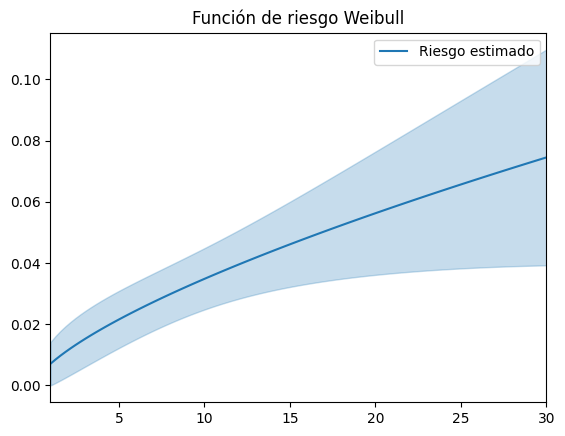

In [109]:
#b) grafique la función de riesgo
mw.plot_hazard(label='Riesgo estimado')
plt.title('Función de riesgo Weibull')
plt.xlim(1,30)

In [114]:
#c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

Tiene forma creciente, es decir que entre más pasa el tiempo el riesgo de quebrar va aumentando

## 5. Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

In [104]:
#a) Ajuste un modelo Log-Normal
mlogn=LogNormalFitter().fit(df_quiebra['tiempo'],df_quiebra['quebrar'])

In [106]:
mlogn.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


Text(0.5, 1.0, 'Función de riesgo LogNormal')

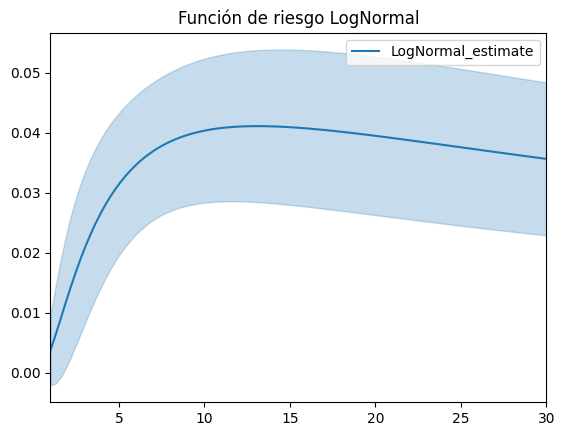

In [150]:
#b)Grafique la función de riesgo
mlogn.plot_hazard()
plt.xlim(1,30)
plt.title('Función de riesgo LogNormal')

In [123]:
#c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente?
riesgo=mlogn.hazard_
print(riesgo.to_string())

           LogNormal_estimate
1.000000             0.003749
1.292929             0.006219
1.585859             0.008870
1.878788             0.011543
2.171717             0.014143
2.464646             0.016613
2.757576             0.018927
3.050505             0.021072
3.343434             0.023047
3.636364             0.024858
3.929293             0.026512
4.222222             0.028019
4.515152             0.029390
4.808081             0.030635
5.101010             0.031764
5.393939             0.032788
5.686869             0.033716
5.979798             0.034555
6.272727             0.035314
6.565657             0.036000
6.858586             0.036618
7.151515             0.037176
7.444444             0.037678
7.737374             0.038129
8.030303             0.038534
8.323232             0.038896
8.616162             0.039219
8.909091             0.039507
9.202020             0.039762
9.494949             0.039987
9.787879             0.040185
10.080808            0.040357
10.373737 

El riesgo de quebrar es creciente desde el inicio hasta el tiempo 14.181818 años, de ahí hasta el final que son 30 años el riesgo es decreciente mientras pasan los años

## 6. - Utilizando el estimador de Kaplan-Meier realice una notebook en Python para responder lo siguiente:

In [124]:
#a) Estime la función de supervivencia y la mediana de tiempo de supervivencia y diga que significa.
KM=KaplanMeierFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])

In [126]:
KM.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


In [132]:
KM.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


Text(0.5, 0, 'tiempo')

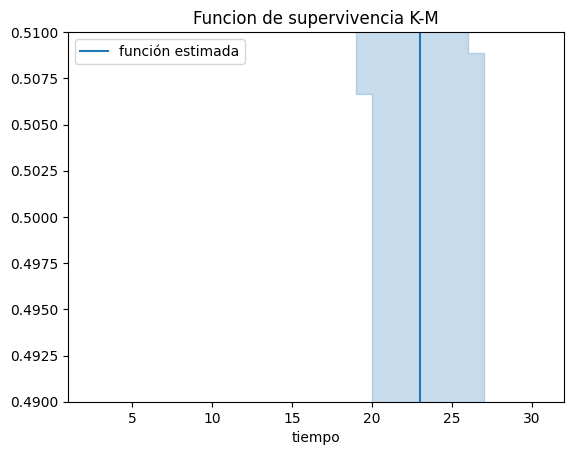

In [138]:
KM.plot_survival_function(label='función estimada')
plt.title('Funcion de supervivencia K-M')
plt.xlim(1,32)
plt.ylim(.49,.51)
plt.xlabel('tiempo')

In [130]:
#La mediana 

La mediana de supervivencia se puede obtener a partir de la curva de Kaplan-Meier como el tiempo en el cual la curva cambia de una probabilidad de supervivencia mayor de 0,5 a una menor de 0,5.
**En este caso la mediana es aproximadamente 22.5**

In [127]:
#b) Estime la función de supervivencia por Kaplan-meier para hombres y mujeres y grafique con .plot_survival_function(ci_show=False) y diga si 
# las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica

In [142]:
hombres=df_quiebra.query('mujer==0')
mujeres=df_quiebra.query('mujer==1')

In [145]:
KM_h=KaplanMeierFitter().fit(hombres['tiempo'], hombres['quebrar'])
KM_m=KaplanMeierFitter().fit(mujeres['tiempo'], mujeres['quebrar'])

Text(0.5, 1.0, 'Función de supervivencia hombres vs mujeres')

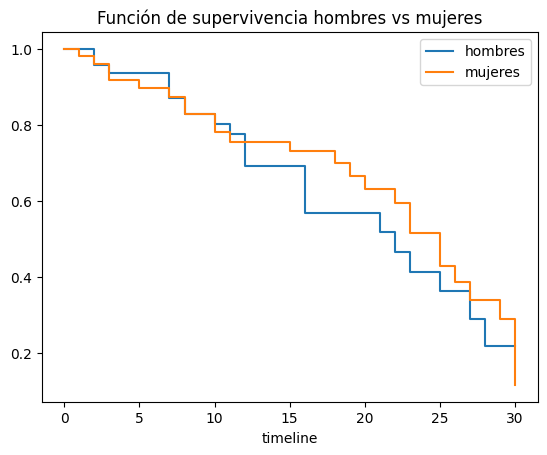

In [149]:
KM_h.plot_survival_function(label='hombres',ci_show=False)
KM_m.plot_survival_function(label='mujeres',ci_show=False)
plt.title('Función de supervivencia hombres vs mujeres')

Es notorio que durante los primeros 10 años las empresas quiebran casi por igual independientemente si el dueño es hombre o mujer, pero a partir del año 12 se puede notar que las empresas creadas por hombres quiebran mas rapido en comparación de las creadas por mujeres

In [151]:
#c) El profesor cree que las empresas fundadas por hombres quiebran más rápido, refute o confirme con evidencia estadística tal afirmación 
# (pruebas de hipótesis, graficas, tablas etc.)

Se puede confirmar con el inciso anterior que las empresas fundadas por hombres quiebra más rápido a partir del año 12 aproximadamente. Con apoyo visual de la gráfica previa además de la siguiente comparación por tiempo de función de supervivencia hombres vs mujeres

In [165]:
comp=pd.concat([KM_h.survival_function_, KM_m.survival_function_], axis=1)

comp


,KM_estimate,KM_estimate
timeline,,
0.0,1.000000,1.000000
1.0,1.000000,0.980392
2.0,0.958333,0.960784
3.0,0.937500,0.919011
4.0,0.937500,0.919011
7.0,0.872093,0.874702
8.0,0.828488,0.829845
9.0,0.828488,0.829845
10.0,0.803383,0.781031
